<a href="https://colab.research.google.com/github/Emmanuelkim254/my_project/blob/main/Customer_Chun_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the pandas library, which is essential for data analysis
import pandas as pd

# URL for the Telco Customer Churn dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

# Read the data from the URL into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame to verify it loaded correctly
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Get a concise summary of the DataFrame (columns, data types, non-null counts)
df.info()

#Get descriptive statistics for numerical columns (like mean, std, min, max)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
# Count the number of customers who churned ('Yes') vs. did not churn ('No')
print("Churn breakdown:")
print(df['Churn']. value_counts())

Churn breakdown:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


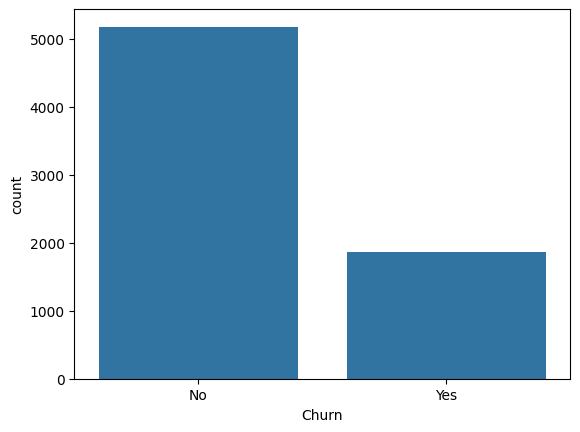

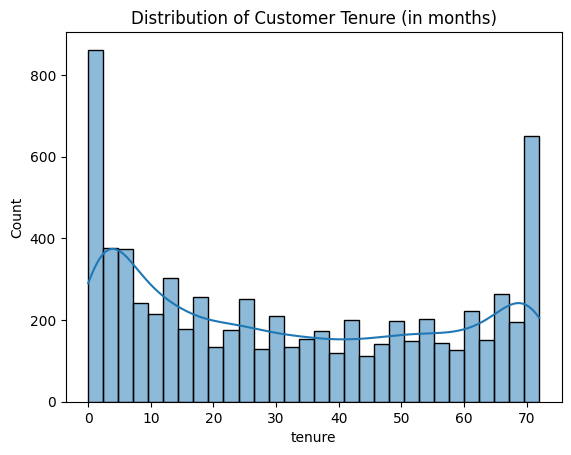

In [4]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Create a bar chart to visualize the churn count
sns.countplot(x='Churn', data=df)
plt.show()

#Create a histogram to see the distribution of customer tenure
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribution of Customer Tenure (in months)')
plt.show()

/tmp/ipython-input-7-1915241235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette= ['#5cb85c', '#d9534f']) # Green for 'No', Red for 'Yes'


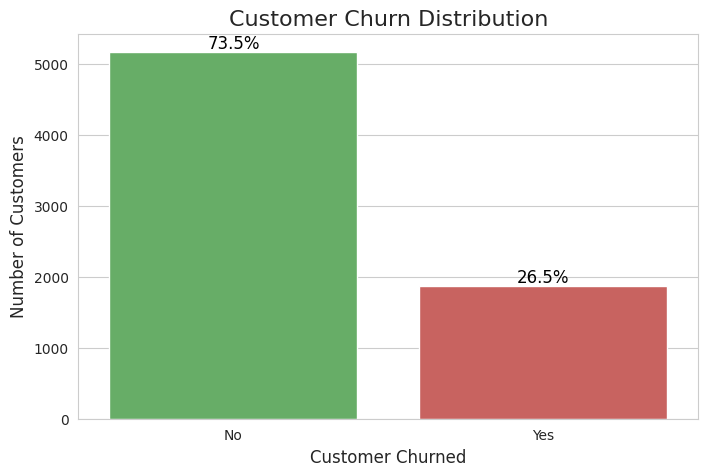

In [7]:
# Set the style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))

#Create the countplot with a color palette
ax = sns.countplot(x='Churn', data=df, palette= ['#5cb85c', '#d9534f']) # Green for 'No', Red for 'Yes'

#Add a title and labels
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Customer Churned', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

#Calculate percentages and add them as annotations
total = len(df)
for p in ax.patches:
  percentage = f'{100 * p.get_height() / total:.1f}%'
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black')

#Show the plot
plt.show()

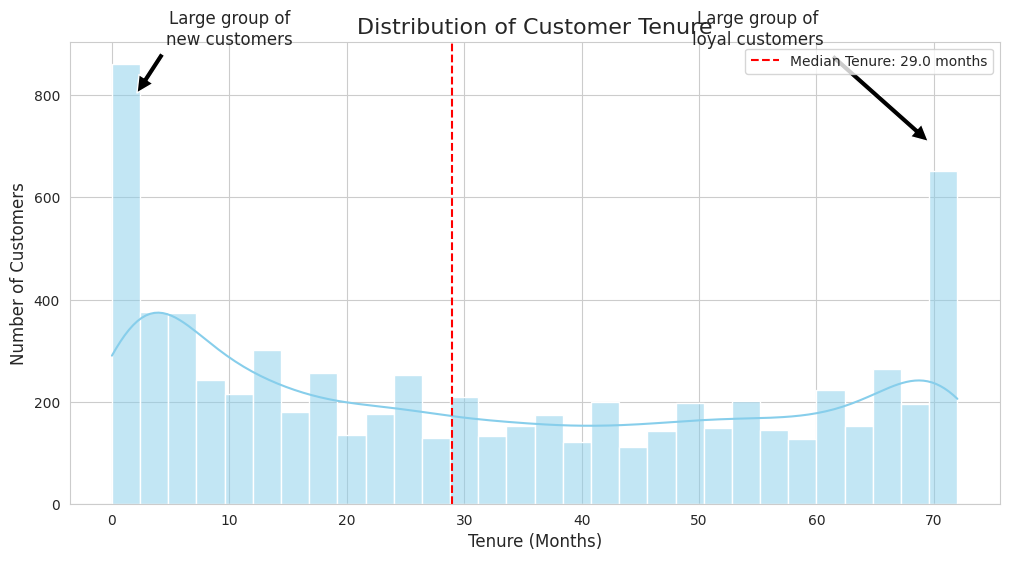

In [9]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data=df, x='tenure', bins=30, kde=True, color='skyblue')

# Add a title and labels
plt.title('Distribution of Customer Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add contextual annotations for our insights
plt.axvline(x=df['tenure'].median(), color='red', linestyle='--', label=f"Median Tenure: {df['tenure'].median():.1f} months")
plt.annotate('Large group of\nnew customers',
             xy=(2, 800),
             xytext=(10, 900),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', fontsize=12)
plt.annotate('Large group of\nloyal customers',
             xy=(70, 700),
             xytext=(55, 900),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', fontsize=12)
# Add a legend
plt.legend()

# Show the plot
plt.show()

# Show the plot

In [10]:
# Convert 'Totalcharges' to a numeric type. Errors will become 'NAN' (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill the missing 'Nan' value with 0.
df['TotalCharges']. fillna(0, inplace=True)

# Verify that there are no missing values in that column
print("Missing values in TotalCharges after cleaning:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges after cleaning: 0


/tmp/ipython-input-10-20647378.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges']. fillna(0, inplace=True)


In [11]:
# Drop the customerID column
df_processed = df.drop('customerID', axis=1)

# Convert all remaining categorical columns into numeric format
df_processed = pd.get_dummies(df_processed, drop_first=True)

# Display the first few rows of the new processed DataFrame
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [12]:
# Import the necessary functions and models from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Separate our data into features (X) and the target (y)
X = df_processed.drop('Churn_Yes', axis=1)
y = df_processed['Churn_Yes']

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Logistic Regression model
# We create an instance of the model
model = LogisticRegression(max_iter=1000)

# We train the model on our training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.82


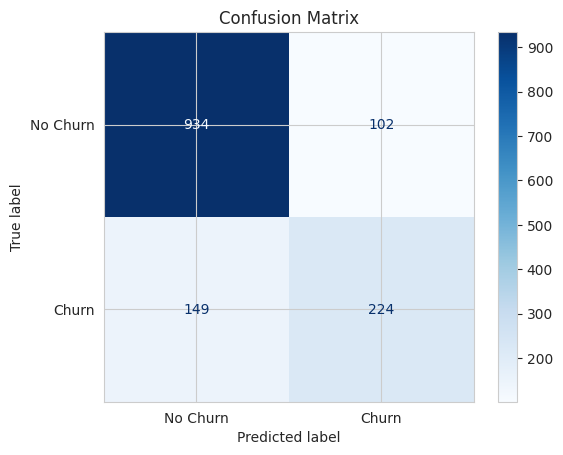

In [13]:
# Import functions for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# 2. Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# 3. Create and display a confusion matrix to see the details
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()